df_agg


vals


[[5.7, 5.7, 6.2, 6.2, 7.0],
 [1.8,
  1.8,
  2.0,
  2.0,
  2.8,
  2.8,
  3.1,
  1.8,
  1.8,
  2.0,
  2.0,
  2.8,
  2.8,
  3.1,
  3.1,
  2.4,
  2.4,
  2.5,
  2.5,
  2.5,
  2.5,
  2.2,
  2.2,
  2.4,
  2.4,
  3.0,
  3.0,
  3.3,
  1.8,
  1.8,
  1.8,
  1.8,
  1.8,
  2.0,
  2.0,
  2.0,
  2.0,
  2.8,
  1.9,
  2.0,
  2.0,
  2.0,
  2.0,
  2.5,
  2.5,
  2.8,
  2.8],
 [2.8,
  3.1,
  4.2,
  2.4,
  2.4,
  3.1,
  3.5,
  3.6,
  2.4,
  2.4,
  2.4,
  2.4,
  2.5,
  2.5,
  3.3,
  2.5,
  2.5,
  3.5,
  3.5,
  3.0,
  3.0,
  3.5,
  3.1,
  3.8,
  3.8,
  3.8,
  5.3,
  2.2,
  2.2,
  2.4,
  2.4,
  3.0,
  3.0,
  3.5,
  1.8,
  1.8,
  2.0,
  2.0,
  2.8,
  2.8,
  3.6],
 [2.4, 3.0, 3.3, 3.3, 3.3, 3.3, 3.3, 3.8, 3.8, 3.8, 4.0],
 [3.7,
  3.7,
  3.9,
  3.9,
  4.7,
  4.7,
  4.7,
  5.2,
  5.2,
  4.7,
  4.7,
  4.7,
  4.7,
  4.7,
  4.7,
  5.2,
  5.2,
  5.7,
  5.9,
  4.2,
  4.2,
  4.6,
  4.6,
  4.6,
  5.4,
  5.4,
  2.7,
  2.7,
  2.7,
  3.4,
  3.4,
  4.0,
  4.0],
 [3.8,
  3.8,
  4.0,
  4.0,
  4.6,
  4.6,
  4.6,
  4.6,
  5.4,
 

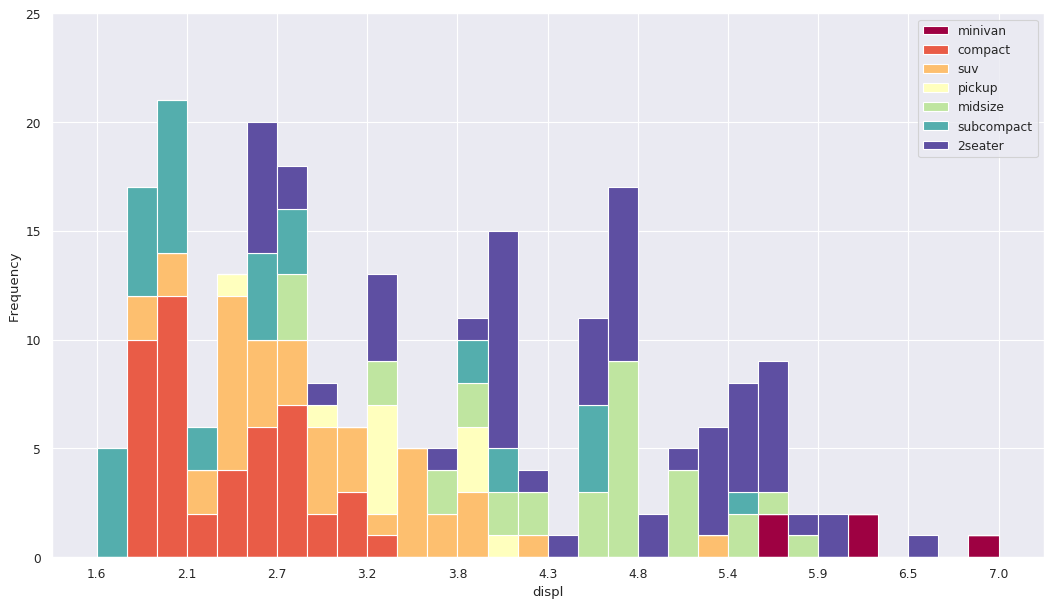

In [7]:
import numpy as np
import pandas as pd
import datetime as dt 
from statsmodels.formula.api import ols 
import seaborn as sns;  sns.set()
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Prepare data
x_var = 'displ'
groupby_var = 'class'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)

print('df_agg')
display(df_agg)
vals = [df[x_var].values.tolist() for i, df in df_agg]
print('vals')
display(vals)
# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
#plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 25)
plt.xticks(ticks=bins[::3], labels=[round(b,1) for b in bins[::3]])
plt.show()